# Exploratory data analysis


### Playlist Dynamics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)
%matplotlib inline

Settings for getting figures in high resolution

In [2]:
# sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
# sns.set_context('notebook')
# sns.set_style("ticks")

In [3]:
df=pd.read_pickle('./dataset_/dataset_cleaned_popularity.pkl')
df.drop(columns=['index', 'level_0'], inplace=True)  # Comes from pickeling the file
df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.31065,2018,11,5
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5


Take a look into the global playlist and make sense of why we have so many songs in it. Assumption is that each playlist should only have 200 songs in it.

In [5]:
df[df['country'] == 'Global']['title'].value_counts()

intro                                                                                        8
paradise                                                                                     6
all night                                                                                    6
sleigh ride                                                                                  6
have yourself a merry little christmas                                                       5
x                                                                                            5
baby                                                                                         5
christmas time                                                                               5
changes                                                                                      5
stay                                                                                         5
christmas                                         

Check multiple songs based on the example of the song sleigh ride.

In [6]:
df[(df['country'] == 'Global') & (df['title'] == 'sleigh ride')]

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
15215,Global,https://open.spotify.com/track/4ukUoXLuFzMixyZ...,200.15,sleigh ride,Ella Fitzgerald,album,adult standards,1766898.0,False,Ella Wishes You A Swinging Christmas (Expanded...,1960-01-01,5,18,0.508,0.287,1,-12.472,1,0.0523,0.764,0.000000,0.1530,0.644,154.759,4,pop,22224.0,0.0,1,0,79,0.0,0.0,global,2.933117,1960,1,1
16619,Global,https://open.spotify.com/track/597IVBYr60vm0HK...,248.55,sleigh ride,Carpenters,album,adult standards,1562181.0,False,Christmas Portrait (Special Edition),1978,5,21,0.694,0.243,11,-15.632,1,0.0723,0.871,0.000000,0.1650,0.578,100.774,4,pop,15115.0,False,1,0,90,0.0,0.0,global,2.657333,1978,1,1
38848,Global,https://open.spotify.com/track/6XAdcAseYtijN0Q...,76.00,sleigh ride,Johnny Mathis,album,adult standards,243064.0,False,Merry Christmas,1958-10-06,3,12,0.605,0.663,1,-8.949,1,0.0274,0.699,0.000000,0.1210,0.893,103.180,4,pop,22676.0,0.0,1,0,132,0.0,0.0,global,2.978667,1958,10,6
46766,Global,https://open.spotify.com/track/1ODZGydlown4Ves...,2169.35,sleigh ride,The Ronettes,album,brill building pop,153854.0,False,NOW 100 Hits Christmas,2019-11-08,9,100,0.527,0.768,2,-7.557,1,0.0304,0.457,0.000002,0.3040,0.799,91.750,4,pop,372.0,1.0,1,0,23,0.0,1.0,global,3.013883,2019,11,8
49133,Global,https://open.spotify.com/track/5ymVfeMK8cDew5v...,76.00,sleigh ride,Andy Williams,album,adult standards,315467.0,False,Merry Christmas,1965,1,12,0.571,0.634,5,-9.155,0,0.0537,0.724,0.000000,0.0864,0.805,109.575,4,pop,19863.0,False,1,0,138,0.0,0.0,global,2.140000,1965,1,1
76936,Global,https://open.spotify.com/track/5ASM6Qjiav2xPe7...,1368.15,sleigh ride,The Ronettes,compilation,brill building pop,153854.0,False,A Christmas Gift For You From Phil Spector,1963,5,13,0.529,0.772,2,-7.013,1,0.0287,0.403,0.000002,0.3160,0.853,91.751,4,pop,20594.0,False,1,0,20,0.0,1.0,global,3.021117,1963,1,1


We have muliple songs with the same name in this example or placed in different albums. The problem is that if a song is listed in two playlists it should still have the same popularity. Also the numeric music features are different in both songs, what might be possible because one song has a new release date and maybe has a better song quality. 

In [7]:
df[(df['country'] == 'Global')]['uri'].value_counts()


https://open.spotify.com/track/6FyRXC8tJUh863JCkyWqtk    1
https://open.spotify.com/track/3kml9ZdpT7UYk1ugkjqOzt    1
https://open.spotify.com/track/5p3JJehpKHjr9pJT5eD2Lz    1
https://open.spotify.com/track/64kfyGcf5dvbw92Vv4THCj    1
https://open.spotify.com/track/6cX1iTffMIAU8lEWSOYIIO    1
                                                        ..
https://open.spotify.com/track/4TzXqUIcdpAmre24puQ6Uu    1
https://open.spotify.com/track/6XjEOPgbgHKcaHcunEHSJJ    1
https://open.spotify.com/track/05KOgYg8PGeJyyWBPi5ja8    1
https://open.spotify.com/track/3ZVw1HR1QAQoKBygbhG4CE    1
https://open.spotify.com/track/7cfvP13Bqb1EyCZQiYsLum    1
Name: uri, Length: 5423, dtype: int64

The top200 ranking of course is not static for a period of 3 years so we have many more songs that are listed over the years. 

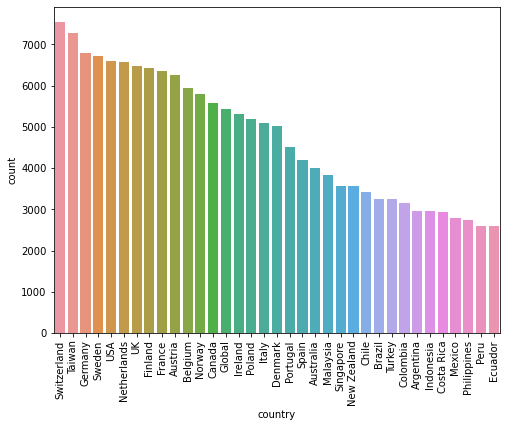

In [8]:
df['country'].value_counts()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='country', data=df, order=df.country.value_counts().index)
ax.tick_params(axis='x', rotation=90)

There is a big difference between western countries and none western countries if we look at the songs listed over a period of 4 years. More music industry heavy countries produce more newcomer artists from which not all of them can make it to the top of the ranking.

Lets focus more on an artists level based analysis. First we take a look at Ed Sheeran and see what songs performed well.

In [9]:
popular_ed_sheeran_songs = df[(df['country'] == 'Global') & (df['artist'] == 'Ed Sheeran')].sort_values(by=['popularity'], ascending=False)['title'][:10]
popular_ed_sheeran_songs

52220          shape of you
14124               perfect
21172           galway girl
27953    castle on the hill
26842            photograph
17500     thinking out loud
50315               happier
72484                  dive
44856       what do i know?
11142    how would you feel
Name: title, dtype: object

Lets find the most popular artist with only one listed song.

In [10]:
df[(df['country'] == 'Global')]['artist'].value_counts().tail(20)


Justin Bieber - BloodPop®                                                  1
DJ Khaled - Rihanna - Bryson Tiller                                        1
Cauty - Brytiago - Darell - Cosculluela - Rafa Pabön - Chencho Corleone    1
Trippie Redd - Baby Goth                                                   1
Dixie D’Amelio                                                             1
Robyn                                                                      1
Haftbefehl - SHIRIN DAVID                                                  1
Rvssian - Anuel AA - Juice WRLD                                            1
Doja Cat - Gucci Mane                                                      1
Lil Skies - Yung Pinch                                                     1
Nacho - Yandel - Bad Bunny - Mambo Kingz - DJ Luian                        1
Future - Rihanna                                                           1
Céline Dion                                                                1

In [11]:
s = df[df['country'] == 'Global']['artist'].value_counts()
artists_w_one_track = s[s == 1].index

In [12]:

df[(df['country'] == 'Global') & (df['artist'].isin(artists_w_one_track))].sort_values(by=['popularity'], ascending=False).head(20)


,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
12449,Global,https://open.spotify.com/track/2dpaYNEQHiRxtZb...,111270.55,happier,Marshmello - Bastille,single,brostep,27670203.0,False,Happier,2018-08-17,1,1,0.687,0.792,5,-2.749,1,0.0452,0.1910,0.000000,0.1670,0.6710,100.015,4,dance/electronic,820.0,1.0,1,0,2,1.0,1.0,global,3.571500,2018,8,17
20108,Global,https://open.spotify.com/track/0u2P5u6lvoDfwTY...,88813.70,lovely,Billie Eilish - Khalid,single,electropop,34697267.0,False,lovely (with Khalid),2018-04-19,1,1,0.351,0.296,4,-10.109,0,0.0333,0.9340,0.000000,0.0950,0.1200,115.284,4,pop,940.0,1.0,1,0,19,0.0,1.0,global,3.336433,2018,4,19
29505,Global,https://open.spotify.com/track/3a1lNhkSLSkpJE4...,85444.85,congratulations,Post Malone - Quavo,album,dfw rap,29173640.0,True,Stoney (Deluxe),2016-12-09,12,18,0.630,0.804,6,-4.183,1,0.0363,0.2150,0.000000,0.2530,0.4920,123.146,4,rap,1427.0,0.0,0,1,20,0.0,1.0,global,3.671550,2016,12,9
17796,Global,https://open.spotify.com/track/6RUKPb4LETWmmr3...,82367.25,something just like this,The Chainsmokers - Coldplay,album,dance pop,16931568.0,False,Memories...Do Not Open,2017-04-07,5,12,0.617,0.635,11,-6.769,0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019,4,pop,1314.0,1.0,1,0,2,1.0,1.0,global,4.119333,2017,4,7
16432,Global,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,77114.60,the box,Roddy Ricch,album,melodic rap,4688338.0,True,Please Excuse Me For Being Antisocial,2019-12-06,2,16,0.896,0.586,10,-6.687,0,0.0559,0.1040,0.000000,0.7900,0.6420,116.971,4,rap,344.0,1.0,0,1,1,1.0,1.0,global,3.277550,2019,12,6
4066,Global,https://open.spotify.com/track/58q2HKrzhC3ozto...,75015.80,i like it,Cardi B - Bad Bunny - J Balvin,album,pop,13132135.0,True,Invasion of Privacy,2018-04-06,7,13,0.816,0.726,5,-3.998,0,0.1290,0.0990,0.000000,0.3720,0.6500,136.048,4,pop,953.0,1.0,0,1,2,1.0,1.0,global,4.223167,2018,4,6
68311,Global,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,70440.85,closer,The Chainsmokers - Halsey,single,dance pop,16931568.0,False,Closer,2016-07-29,1,1,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.1110,0.6610,95.010,4,pop,1560.0,0.0,1,0,2,1.0,1.0,global,4.082667,2016,7,29
47319,Global,https://open.spotify.com/track/7ef4DlsgrMEH11c...,66502.05,one kiss,Calvin Harris - Dua Lipa,single,dance pop,20814678.0,False,One Kiss (with Dua Lipa),2018-04-06,1,1,0.791,0.862,9,-3.240,0,0.1100,0.0370,0.000022,0.0814,0.5920,123.994,4,pop,953.0,1.0,1,0,1,1.0,1.0,global,3.580783,2018,4,6
35752,Global,https://open.spotify.com/track/4aWmUDTfIPGksMN...,64239.90,despacito,Luis Fonsi - Daddy Yankee,single,latin,8932627.0,False,Despacito (Featuring Daddy Yankee),2017-01-13,1,1,0.660,0.786,2,-4.757,1,0.1700,0.2090,0.000000,0.1120,0.8460,177.833,4,latin,1397.0,1.0,1,0,1,1.0,1.0,global,3.803333,2017,1,13
19628,Global,https://open.spotify.com/track/7k4t7uLgtOxPwTp...,63930.30,tusa,KAROL G - Nicki Minaj,single,latin,12839172.0,False,Tusa,2019-11-07,1,1,0.803,0.715,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.5740,101.085,4,latin,373.0,1.0,1,0,3,1.0,1.0,global,3.349333,2019,11,7


In [13]:
# Exclude all artist collaborations
none_famous_artists = df[(df['country'] == 'Global') & 
                         (df['artist'].isin(artists_w_one_track)) & 
                         (~df['artist'].str.contains('-'))
                         ].sort_values(by=['popularity'], ascending=False)['uri'][:5]


### Dynamics of songs from full database

In [14]:
df_db = pd.read_csv('.\dataset_\Database to calculate popularity.csv\Database to calculate popularity.csv')
df_db.head(20)

,Unnamed: 0,country,date,position,uri,track,title,artist
0,0,Global,05/11/2020,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,1,Global,05/11/2020,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,2,Global,05/11/2020,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",Mood,24kGoldn
3,3,Global,05/11/2020,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",Lemonade,Internet Money
4,4,Global,05/11/2020,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",Lonely,Justin Bieber
5,5,Global,05/11/2020,6.0,https://open.spotify.com/track/1tkg4EHVoqnhR6i...,"What You Know Bout Love , Pop Smoke",What You Know Bout Love,Pop Smoke
6,6,Global,05/11/2020,7.0,https://open.spotify.com/track/0t1kP63rueHleOh...,"Dynamite , BTS",Dynamite,BTS
7,7,Global,05/11/2020,8.0,https://open.spotify.com/track/1yoMvmasuxZfqHE...,"Hawái , Maluma",Hawái,Maluma
8,8,Global,05/11/2020,9.0,https://open.spotify.com/track/6Im9k8u9iIzKMrm...,"34+35 , Ariana Grande",34+35,Ariana Grande
9,9,Global,05/11/2020,10.0,https://open.spotify.com/track/4Oun2ylbjFKMPTi...,"WAP , Cardi B",WAP,Cardi B


In [15]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807001 entries, 0 to 9807000
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   country     object 
 2   date        object 
 3   position    float64
 4   uri         object 
 5   track       object 
 6   title       object 
 7   artist      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 598.6+ MB


In [17]:
df_db = df_db.replace(r"^ +| +$", r"", regex=True)  # Delete leading and trailing

In [18]:
df_db['title'] = df_db['title'].str.lower()

In [19]:
df_db = df_db.astype({'position': int}, errors='ignore')

In [20]:
df_db['date'] = pd.to_datetime(df_db['date'], format='%d/%m/%Y')
df_db.head(10)

,Unnamed: 0,country,date,position,uri,track,title,artist
0,0,Global,2020-11-05,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",dakiti,"Bad Bunny, Jhay Cortez"
1,1,Global,2020-11-05,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,2,Global,2020-11-05,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",mood,24kGoldn
3,3,Global,2020-11-05,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",lemonade,Internet Money
4,4,Global,2020-11-05,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",lonely,Justin Bieber
5,5,Global,2020-11-05,6.0,https://open.spotify.com/track/1tkg4EHVoqnhR6i...,"What You Know Bout Love , Pop Smoke",what you know bout love,Pop Smoke
6,6,Global,2020-11-05,7.0,https://open.spotify.com/track/0t1kP63rueHleOh...,"Dynamite , BTS",dynamite,BTS
7,7,Global,2020-11-05,8.0,https://open.spotify.com/track/1yoMvmasuxZfqHE...,"Hawái , Maluma",hawái,Maluma
8,8,Global,2020-11-05,9.0,https://open.spotify.com/track/6Im9k8u9iIzKMrm...,"34+35 , Ariana Grande",34+35,Ariana Grande
9,9,Global,2020-11-05,10.0,https://open.spotify.com/track/4Oun2ylbjFKMPTi...,"WAP , Cardi B",wap,Cardi B


In [21]:
df_db.shape

(9807001, 8)

In [22]:
df_db['position_7day_ave'] = df_db['position'].rolling(3).mean().shift(-3)

In [23]:
df_db[df_db['country'] == 'Global']

,Unnamed: 0,country,date,position,uri,track,title,artist,position_7day_ave
0,0,Global,2020-11-05,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",dakiti,"Bad Bunny, Jhay Cortez",3.000000
1,1,Global,2020-11-05,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande,4.000000
2,2,Global,2020-11-05,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",mood,24kGoldn,5.000000
3,3,Global,2020-11-05,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",lemonade,Internet Money,6.000000
4,4,Global,2020-11-05,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",lonely,Justin Bieber,7.000000
...,...,...,...,...,...,...,...,...,...
280195,280195,Global,2017-01-01,196.0,https://open.spotify.com/track/6eT7xZZlB2mwyzJ...,"White Iverson , Post Malone",white iverson,Post Malone,198.000000
280196,280196,Global,2017-01-01,197.0,https://open.spotify.com/track/1sTUEdVO85YU8Ym...,"Oh Lord , MiC LOWRY",oh lord,MiC LOWRY,199.000000
280197,280197,Global,2017-01-01,198.0,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...,"Superstition - Single Version , Stevie Wonder",superstition - single version,Stevie Wonder,133.333333
280198,280198,Global,2017-01-01,199.0,https://open.spotify.com/track/3DX4Y0egvc0slLc...,"Secrets , The Weeknd",secrets,The Weeknd,67.666667


In [24]:
df_db[df_db['country'] == 'Global']['artist'].value_counts().head(20)

Ed Sheeran         8800
Post Malone        6385
XXXTENTACION       5853
Billie Eilish      5400
Drake              4675
Travis Scott       3668
Juice WRLD         3575
Imagine Dragons    3444
Ariana Grande      2935
Khalid             2856
Dua Lipa           2371
Kendrick Lamar     2359
Shawn Mendes       2349
Queen              2152
Lil Uzi Vert       1973
Taylor Swift       1966
The Weeknd         1843
Bad Bunny          1836
Eminem             1828
Maroon 5           1789
Name: artist, dtype: int64

In [25]:
df_ed_sheeran= df_db[(df_db['country'] == 'Global') & (df_db['artist'] == 'Ed Sheeran')]
df_ed_sheeran

,Unnamed: 0,country,date,position,uri,track,title,artist,position_7day_ave
140,140,Global,2020-11-05,141.0,https://open.spotify.com/track/0tgVpDi06FyKpA1...,"Perfect , Ed Sheeran",perfect,Ed Sheeran,143.0
162,162,Global,2020-11-05,163.0,https://open.spotify.com/track/0hVXuCcriWRGvwM...,"I Don't Care , Ed Sheeran",i don't care,Ed Sheeran,165.0
163,163,Global,2020-11-05,164.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,"Shape of You , Ed Sheeran",shape of you,Ed Sheeran,166.0
188,188,Global,2020-11-05,189.0,https://open.spotify.com/track/70eFcWOvlMObDhU...,"Beautiful People , Ed Sheeran",beautiful people,Ed Sheeran,191.0
196,196,Global,2020-11-05,197.0,https://open.spotify.com/track/6fxVffaTuwjgEk5...,"Photograph , Ed Sheeran",photograph,Ed Sheeran,199.0
...,...,...,...,...,...,...,...,...,...
279708,279708,Global,2017-01-03,109.0,https://open.spotify.com/track/1Slwb6dOYkBlWal...,"Thinking out Loud , Ed Sheeran",thinking out loud,Ed Sheeran,111.0
279890,279890,Global,2017-01-02,91.0,https://open.spotify.com/track/6fxVffaTuwjgEk5...,"Photograph , Ed Sheeran",photograph,Ed Sheeran,93.0
279908,279908,Global,2017-01-02,109.0,https://open.spotify.com/track/1Slwb6dOYkBlWal...,"Thinking out Loud , Ed Sheeran",thinking out loud,Ed Sheeran,111.0
280122,280122,Global,2017-01-01,123.0,https://open.spotify.com/track/6fxVffaTuwjgEk5...,"Photograph , Ed Sheeran",photograph,Ed Sheeran,125.0


In [26]:
df_db[(df_db['country'] == 'Global') & (df_db['artist'] == 'Ed Sheeran')]['title'].value_counts().head(20)


shape of you           1393
perfect                1336
photograph             1002
thinking out loud       863
happier                 624
i don't care            546
beautiful people        493
galway girl             405
castle on the hill      385
perfect duet            307
south of the border     248
dive                    146
cross me                115
what do i know?          95
new man                  75
how would you feel       70
supermarket flowers      69
barcelona                67
antisocial               61
nancy mulligan           50
Name: title, dtype: int64

In [27]:
popular_ed_sheeran_songs = list(popular_ed_sheeran_songs.values)


In [28]:
palette = sns.color_palette()
hex = palette.as_hex()
colors = {cat:hex for cat, hex in zip(popular_ed_sheeran_songs[:5], hex[5:])}
colors

{'shape of you': '#8c564b',
 'perfect': '#e377c2',
 'galway girl': '#7f7f7f',
 'castle on the hill': '#bcbd22',
 'photograph': '#17becf'}

In [29]:
df_ed_sheeran_first5 = df_ed_sheeran[df_ed_sheeran['title'].str.lower().isin(popular_ed_sheeran_songs[:5])]
df_ed_sheeran_next5 = df_ed_sheeran[df_ed_sheeran['title'].str.lower().isin(popular_ed_sheeran_songs[5:])]


[Text(0.5, 1.0, 'Global Ranking Positions of top5 Popular Ed Sheeran Songs')]

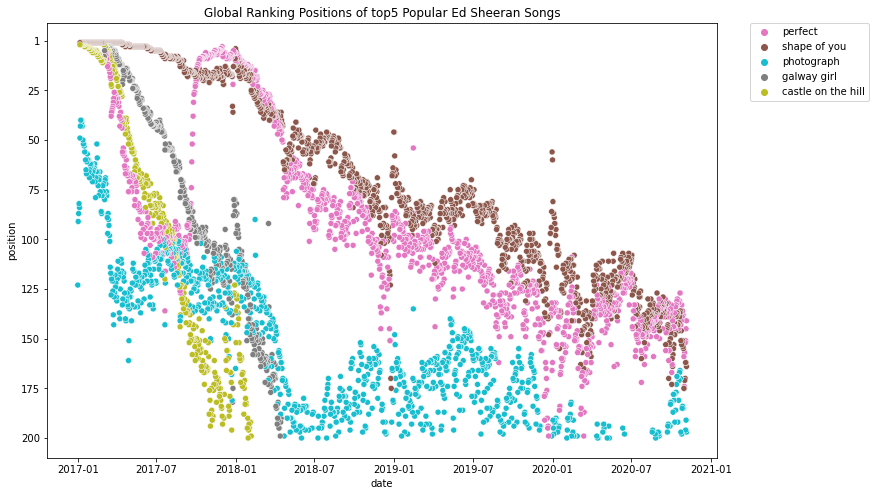

In [30]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position', data=df_ed_sheeran_first5, hue='title', palette=colors)
# sns.lineplot(x='date', y='position_7day_ave', data=df_ed_sheeran_first5, hue='title')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax.set(title='Global Ranking Positions of top5 Popular Ed Sheeran Songs')



Now lets take a a look and compare the same top5 songs of ed sheeran in taiwan with global.

In [31]:
df_taiwan_ed_sheeran = df_db[(df_db['country'] == 'Taiwan') & (df_db['artist'] == 'Ed Sheeran')]
df_taiwan_ed_sheeran_first5 = df_taiwan_ed_sheeran[df_taiwan_ed_sheeran['title'].str.lower().isin(popular_ed_sheeran_songs[:5])]

[Text(0.5, 1.0, 'Taiwan Ranking Positions of top5 Popular Ed Sheeran Songs')]

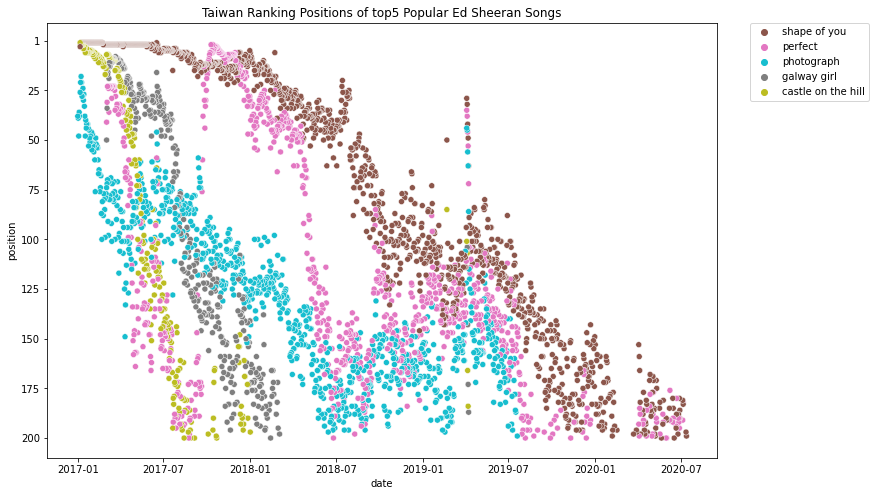

In [32]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_taiwan_ed_sheeran_first5, hue='title', palette=colors)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100',
                   '125', '150', '175', '200'])
ax.set(title='Taiwan Ranking Positions of top5 Popular Ed Sheeran Songs')

[Text(0.5, 1.0, 'Ranking Positions of top5-10 Popular Ed Sheeran Songs')]

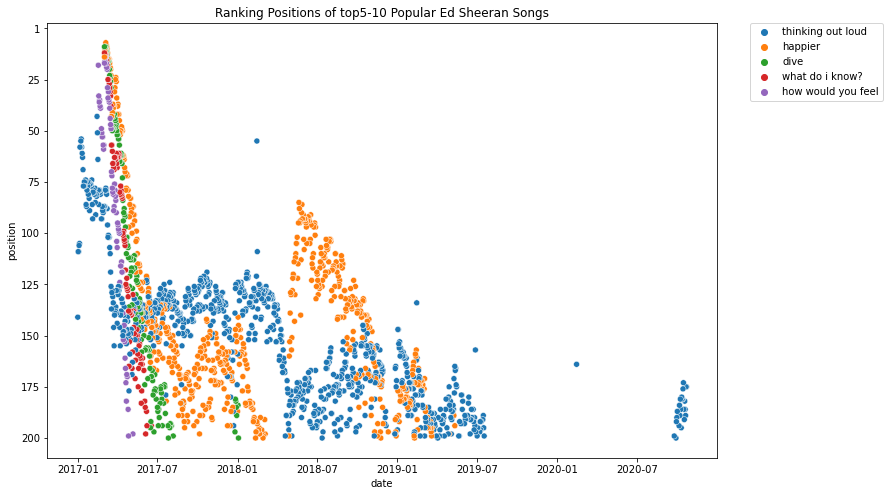

In [33]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_ed_sheeran_next5, hue='title')
# sns.lineplot(x='date', y='position_7day_ave', data=df_ed_sheeran_first5, hue='title')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100',
                   '125', '150', '175', '200'])
ax.set(title='Ranking Positions of top5-10 Popular Ed Sheeran Songs')


In [34]:
df_luis_fonsi = df_db[(df_db['country'] == 'Global') &
                      (df_db['artist'] == 'Luis Fonsi')]
df_luis_fonsi.head(10)


,Unnamed: 0,country,date,position,uri,track,title,artist,position_7day_ave
167596,167596,Global,2018-07-22,197.0,https://open.spotify.com/track/7CUYHcu0RnbOnMz...,"Despacito , Luis Fonsi",despacito,Luis Fonsi,199.000000
167791,167791,Global,2018-07-21,192.0,https://open.spotify.com/track/7CUYHcu0RnbOnMz...,"Despacito , Luis Fonsi",despacito,Luis Fonsi,194.000000
168793,168793,Global,2018-07-16,194.0,https://open.spotify.com/track/7CUYHcu0RnbOnMz...,"Despacito , Luis Fonsi",despacito,Luis Fonsi,196.000000
168966,168966,Global,2018-07-15,167.0,https://open.spotify.com/track/7CUYHcu0RnbOnMz...,"Despacito , Luis Fonsi",despacito,Luis Fonsi,169.000000
169177,169177,Global,2018-07-14,178.0,https://open.spotify.com/track/7CUYHcu0RnbOnMz...,"Despacito , Luis Fonsi",despacito,Luis Fonsi,180.000000
171993,171993,Global,2018-06-30,194.0,https://open.spotify.com/track/4aWmUDTfIPGksMN...,"Despacito , Luis Fonsi",despacito,Luis Fonsi,196.000000
173396,173396,Global,2018-06-23,197.0,https://open.spotify.com/track/4aWmUDTfIPGksMN...,"Despacito , Luis Fonsi",despacito,Luis Fonsi,199.000000
187197,187197,Global,2018-04-15,198.0,https://open.spotify.com/track/4aWmUDTfIPGksMN...,"Despacito , Luis Fonsi",despacito,Luis Fonsi,133.333333
187382,187382,Global,2018-04-14,183.0,https://open.spotify.com/track/4aWmUDTfIPGksMN...,"Despacito , Luis Fonsi",despacito,Luis Fonsi,185.000000
188586,188586,Global,2018-04-08,187.0,https://open.spotify.com/track/4aWmUDTfIPGksMN...,"Despacito , Luis Fonsi",despacito,Luis Fonsi,189.000000


[Text(0.5, 1.0, 'Ranking Position of the Song Despacito')]

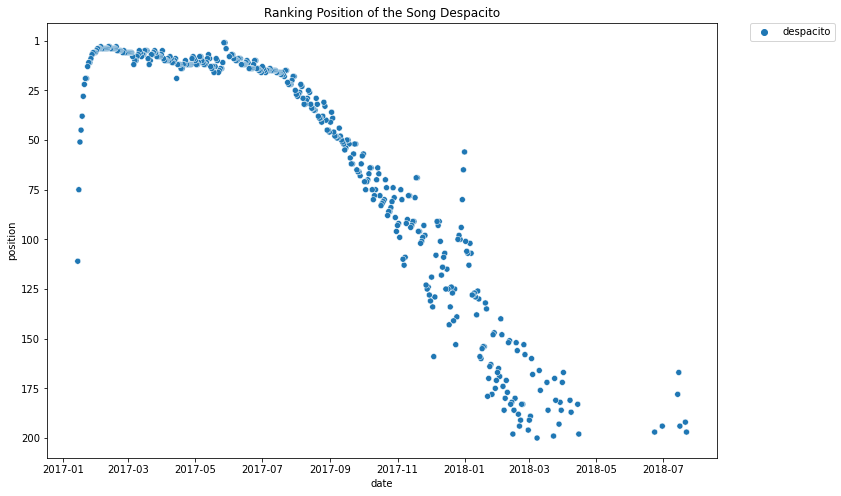

In [35]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_luis_fonsi, hue='title')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100',
                   '125', '150', '175', '200'])
ax.set(title='Ranking Position of the Song Despacito')

In [36]:
df_none_popular = df_db[(df_db['uri'].isin(list(none_famous_artists))) & (df_db['country'] == 'Global')]

[Text(0.5, 1.0, 'Ranking Position of top5 most popular artists that have only one Song')]

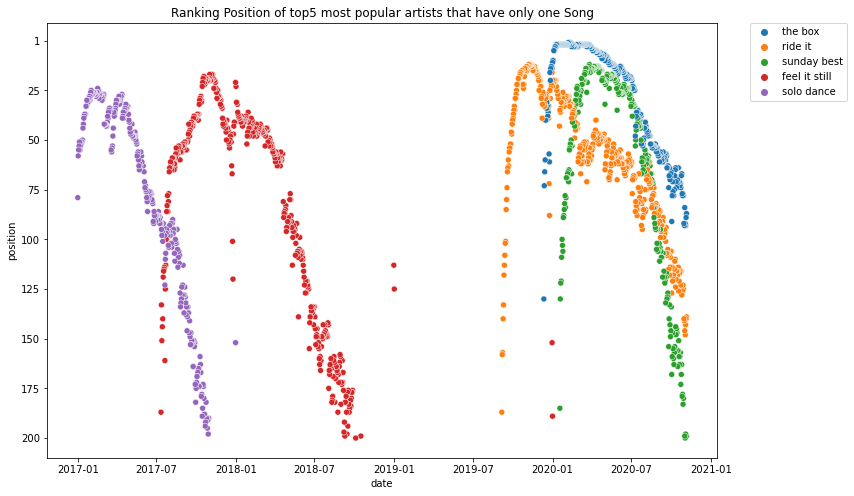

In [37]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_none_popular, hue='title')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100',
                   '125', '150', '175', '200'])
ax.set(title='Ranking Position of top5 most popular artists that have only one Song')
